# <b> Food Recommendation Base On Emotion for College Student

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

In [2]:
food_recommend = pd.read_csv('dataset/food_coded.csv') 
food_recommend.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [3]:
food_recommend.describe(include='all')

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
count,123,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,124,123,106.000000,...,124.000000,123.000000,125.000000,124.000000,125.000000,99,125.000000,125.000000,125.000000,123
unique,38,NaN,NaN,NaN,NaN,NaN,NaN,124,106,NaN,...,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN,NaN,47
top,3.5,NaN,NaN,NaN,NaN,NaN,NaN,none,boredom,NaN,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,135
freq,13,NaN,NaN,NaN,NaN,NaN,NaN,1,7,NaN,...,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,8
mean,NaN,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,NaN,NaN,2.698113,...,1.217742,1.390244,3.336000,947.580645,555.040000,NaN,4.008000,1.512000,1073.400000,NaN
std,NaN,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,NaN,NaN,1.972042,...,0.414385,0.489800,1.436528,202.090179,152.370379,NaN,1.081337,0.501867,248.667092,NaN
min,NaN,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,NaN,NaN,1.000000,...,1.000000,1.000000,1.000000,580.000000,345.000000,NaN,1.000000,1.000000,575.000000,NaN
25%,NaN,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,NaN,NaN,2.000000,...,1.000000,1.000000,2.000000,725.000000,500.000000,NaN,3.000000,1.000000,900.000000,NaN
50%,NaN,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,NaN,NaN,2.000000,...,1.000000,1.000000,3.000000,940.000000,500.000000,NaN,4.000000,2.000000,900.000000,NaN
75%,NaN,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,NaN,NaN,3.000000,...,1.000000,2.000000,5.000000,1165.000000,690.000000,NaN,5.000000,2.000000,1315.000000,NaN


## Data Cleaning and Preparation for food dataset
- We decide to see the distribution of GPA and Gender in this dataset to understand student personality more


c:\Users\traml\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, "'GPA' distribution")

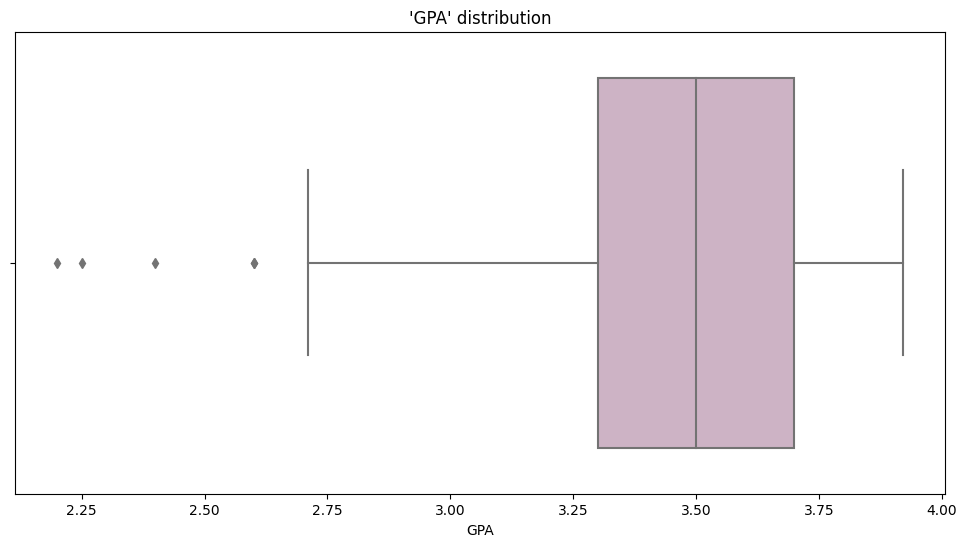

In [4]:
# food_recommend.info()
# Plot distribution 
food_recommend['GPA'].unique()
# There is nan and string value. Need to clean and fill those value
food_recommend['GPA'] = food_recommend['GPA'].str.extract(r'(^\d\.\d+)').replace((np.nan, ''), '3.5').astype(float)
fig, ax = plt.subplots(figsize=[12,6])
sns.boxplot(x=food_recommend['GPA'], color= '#d1afc7')
ax.set_title("'GPA' distribution")


c:\Users\traml\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\traml\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\traml\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\traml\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

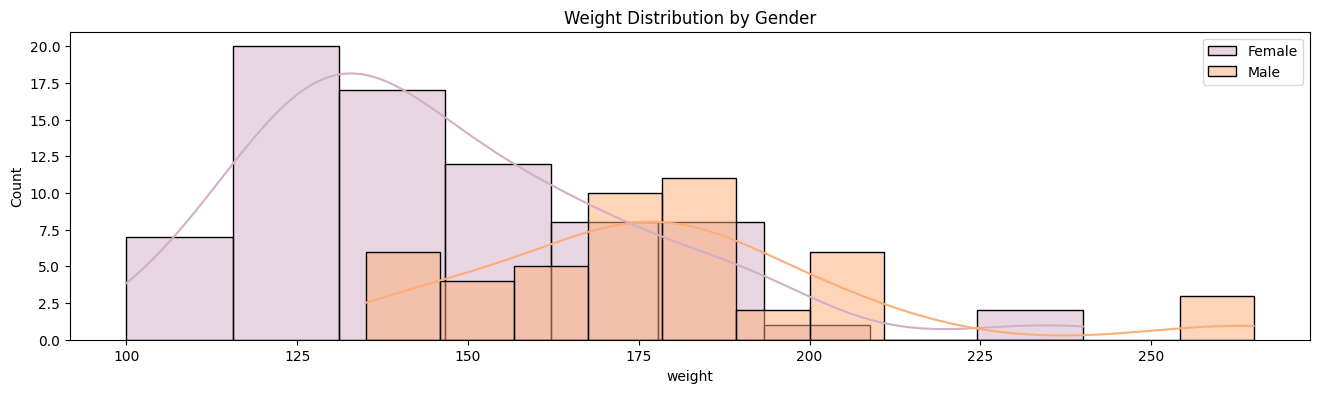

In [5]:


food_recommend['weight'] = food_recommend['weight'].astype(str)
food_recommend['weight'] = food_recommend['weight'].str.extract(r'(\d+)').astype(float)

pastel_palette = ["#d1afc7", "#ffad76"]
weight_mean = {}
weight_std = {}
fig, ax = plt.subplots(figsize=[16,4])
sex_dict = {1: 'Female', 2: 'Male'}
# Create two distributions for both genders
for gen, frame in food_recommend[['Gender', 'weight']].dropna().groupby('Gender'):
    weight_mean[gen] = frame['weight'].mean()
    weight_std[gen] = frame['weight'].std()
    sns.histplot(frame['weight'], ax=ax, color=pastel_palette[gen - 1], label=sex_dict[gen], kde=True)  # Use histplot and add KDE

ax.set_title('Weight Distribution by Gender')
ax.legend()
plt.show()

### For our recommendation algorithm. We mainly use comfort_food contains all food types and reason contains all the emotions

In [36]:
# only take two attributes comfort_food and comfort_food_reason and rename
food_recommend.rename(columns={'comfort_food': 'Food Types', 'comfort_food_reasons': 'Emotions'}, inplace=True)
food_recommend[['Food Types','Emotions']]

,Food Types,Emotions
0,,we dont have comfort
1,"chocolate, chips, ice cream","Stress, bored, anger"
2,"frozen yogurt, pizza, fast food","stress, sadness"
3,"Pizza, Mac and cheese, ice cream",Boredom
4,"Ice cream, chocolate, chips","Stress, boredom, cravings"
...,...,...
120,"wine. mac and cheese, pizza, ice cream",boredom and sadness
121,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness
122,"rice, potato, seaweed soup",sadness
123,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods"


## Data clean for nan value

In [37]:
food_recommend["Emotions"] = food_recommend["Emotions"].fillna("")
food_recommend["Food Types"] = food_recommend["Food Types"].fillna("").replace('none',"")
# food_recommend["Emotions"].unique()
# food_recommend["Food Types"].unique()

## Exploring BERTopic for food and emotion

In [88]:
from bertopic import BERTopic
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap


topic_model_food = BERTopic()
topic_food, food_embedd = topic_model_food.fit_transform(food_recommend['Food Types'])

topic_model_emotions = BERTopic()
topic_emotions, emotion_embedd = topic_model_emotions.fit_transform(food_recommend['Emotions'])

# Reshape to 2 dimensional space
food_embedd_reshaped = food_embedd.reshape(-1, 1)
emotion_embedd_reshaped = emotion_embedd.reshape(-1, 1)
# print("Food embeddings shape:", food_embedd_reshaped.shape)
# print("Emotion embeddings shape:", emotion_embedd_reshaped.shape)

pd.set_option('display.max_rows', None)

topic_info_food = topic_model_food.get_topic_info()  
display(topic_info_food)

topic_info_emotions = topic_model_emotions.get_topic_info()  
display(topic_info_emotions)
pd.set_option('display.max_rows', 10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,44,-1_pizza_food_chinese_chicken,"[pizza, food, chinese, chicken, fries, cookies...","[Chips, Mac and cheese, pizza, French fries , ..."
1,0,35,0_chocolate_ice_cream_pizza,"[chocolate, ice, cream, pizza, soup, pasta, ca...","[Pizza, chocolate, and ice cream , Chocolate, ..."
2,1,30,1_chips_candy_ice_cream,"[chips, candy, ice, cream, snacks, chocolate, ...","[chocolate, chips, ice cream, Chips, ice cream..."
3,2,16,2_mac_cheese_and_pizza,"[mac, cheese, and, pizza, cream, ice, sandwich...","[pizza, pasta, mac and cheese, Pizza, Mac and ..."


,Topic,Count,Name,Representation,Representative_Docs
0,0,106,0_boredom_sadness_stress_and,"[boredom, sadness, stress, and, when, anger, c...","[Stress, boredom, sadness, Stress, sadness, bo..."
1,1,19,1_boredom_lazyniss_lazy_tired,"[boredom, lazyniss, lazy, tired, mostly, celeb...","[boredom, Boredom, boredom]"


## Correction between food topics and emotion topic using Bertopic

label_emotions         0         1
label_food                        
-1              0.909091  0.090909
 0              0.857143  0.142857
 1              0.800000  0.200000
 2              0.750000  0.250000


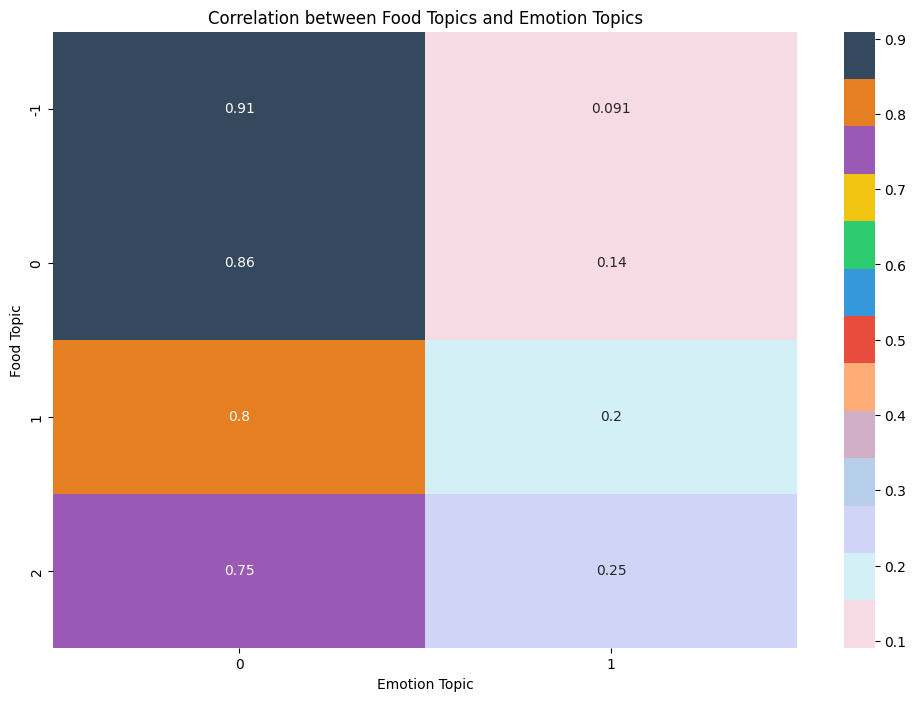

In [89]:

food_recommend['label_food'] = topic_food
food_recommend['label_emotions'] = topic_emotions
topic_combination_counts  = food_recommend.groupby(['label_food', 'label_emotions']).size().unstack(fill_value=0)
topic_combination_proportions  = topic_combination_counts.div(topic_combination_counts.sum(axis=1), axis=0)

print(topic_combination_proportions)
pastel_palette = ["#f6dae4", "#d4f0f7", "#d0d5f7", "#b8cfec", "#d1afc7", "#ffad76","#e74c3c", "#3498db", "#2ecc71", "#f1c40f", "#9b59b6", "#e67e22", "#34495e"]
pastel_cmap = LinearSegmentedColormap.from_list("Custom Pastel", pastel_palette, N=len(pastel_palette))
plt.figure(figsize=(12, 8))
sns.heatmap(topic_combination_proportions, annot=True, cmap=pastel_cmap)
plt.title('Correlation between Food Topics and Emotion Topics')
plt.ylabel('Food Topic')
plt.xlabel('Emotion Topic')
plt.show()


## Supervised learning task on emotion topic

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


combined_features = np.concatenate((food_embedd_reshaped, emotion_embedd_reshaped), axis=1)

# Use emotion topics as labels for the classifier
labels = food_recommend['label_emotions']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
logistic_pred = logistic_clf.predict(X_test)

# Train the Decision Tree Classifier model
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)
decision_tree_pred = decision_tree_clf.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       0.00      0.00      0.00         4

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       0.00      0.00      0.00         4

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25



## Supervised learning task on food topic

In [91]:
labels = food_recommend['label_food']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
logistic_pred = logistic_clf.predict(X_test)

# Train the Decision Tree Classifier model
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)
decision_tree_pred = decision_tree_clf.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        13
           0       0.58      1.00      0.74         7
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.43        25
weighted avg       0.68      0.80      0.73        25

Decision Tree Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        13
           0       1.00      0.57      0.73         7
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         1

    accuracy                           0.76        25
   macro avg       0.67      0.52      0.57        25
weighted avg       0.91      0.76      0.82        25



## Text Processing with NLTK: Algorithm we use to connect emotion to specific foods
- Apply NLTK Stopwords to filter out all common words
- Apply NLTK Lemmatizer to reduce or filter the part in words base on it root

In [38]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Filter all common words
stop = set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',''])
lemmatizer = WordNetLemmatizer()
food_count = {}

# Processing
def preprocess_text(emotion, food_recommend):

    global food_count
    food_count = {}

    for i in range(len(food_recommend)):

        emotions_item = food_recommend["Emotions"][i]
        if isinstance(emotions_item, str):
            emotions = emotions_item.lower().split()
            emotions = [lemmatizer.lemmatize(word.strip('.,')) for word in emotions if word not in stop]

        if emotion in emotions:
            foods = food_recommend["Food Types"][i].lower().split(',')
            foods = [lemmatizer.lemmatize(food.strip().strip('.,')) for food in foods if food not in stop]

            for itemfood in foods:
                if itemfood not in food_count.keys():
                     food_count[itemfood] = 1 
                else:
                     food_count[itemfood] += 1

    top_foods = sorted(food_count, key=food_count.get, reverse=True)[:10]
    return top_foods

def food_result(emotion):
    topn = []
    topn = preprocess_text(emotion, food_recommend)
    print(f"Popular Comfort Foods in {emotion} are:")
    for food in topn:
        print(food)


In [39]:
#food_result('yellow')        
#food_result('satisfaction')  
#food_result('late')           
# food_result('sadness')
# food_result('stressed')
# food_result('happy')
# food_result('happiness')
food_result('bored')


Popular Comfort Foods in bored are:
chip
ice cream
cooky
pizza
chocolate
hot chocolate
beef jerky
dip
fry
chicken wings


## Convert json to csv

In [11]:
# Convert yelp_business.json to csv
# restaurant_location = pd.read_json('dataset/yelp_academic_dataset_business.json', lines=True)
# restaurant_location.to_csv('dataset/restaurant_location.csv', index=False)

## Data Exploration For Restaurant

In [92]:
restaurant_cusine = pd.read_csv('dataset/restaurant_location.csv', sep=',')
restaurant_cusine.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Data Cleaning for restaurant dataset

In [13]:
print("There are", len(restaurant_cusine), "businesses in dataset")
print("There are", restaurant_cusine['categories'].isnull().values.sum(), "businesses without categories.")
df_restaurant = restaurant_cusine.dropna(subset=['categories'])
print("There are", len(df_restaurant), "after drop all nan value in dataset")

df_categories = pd.DataFrame(df_restaurant['categories'].apply(lambda x: x.split(', ') if x is not None else []))
df_categories_exploded = df_categories.explode('categories').groupby('categories')
restaurant_categories = pd.DataFrame(df_categories_exploded.categories.value_counts())
restaurant_categories = restaurant_categories.sort_values(by="count", ascending=False)
restaurant_categories


There are 150346 businesses in dataset
There are 103 businesses without categories.
There are 150243 after drop all nan value in dataset


,count
categories,
Restaurants,52268
Food,27781
Shopping,24395
Home Services,14356
Beauty & Spas,14292
Nightlife,12281
Health & Medical,11890
Local Services,11198
Bars,11065


## Filtering out restaurants/foods out of other busniesses in USA

There is 64629 restaurants in the dataset.


In [14]:
def get_restaurants(cusine):
    restaurants = [] 
    for i, row in cusine.iterrows():
    
        categories = row['categories']
        if categories is None:
            continue
        try:
            if 'Restaurant' in categories or 'Food' in categories:
               # print("test")
                restaurants.append(row)
        except:
            continue
    return pd.DataFrame(restaurants)

restaurantsUSA_df = get_restaurants(df_restaurant)
# restaurantsUSA_df[['categories','state','longitude','latitude']]
print(len(restaurantsUSA_df))

64629


## Using Kmeans to cluster where is popular restaurant locate in USA
- We also apply the median of the rating, the standard deviation, proportion of rating to make sure our cluster is stable and quality so that we know which location will be the best choice to pick

Cluster 0:
  Average Rating: 3.5
  Median Rating: 3.5
  Standard Deviation: 0.8315607319534479
  Count of High Ratings (≥ 3.5): 16959
Cluster 1:
  Average Rating: 4.0
  Median Rating: 4.0
  Standard Deviation: 0.8208157202540601
  Count of High Ratings (≥ 3.5): 4702
Cluster 2:
  Average Rating: 4.0
  Median Rating: 4.0
  Standard Deviation: 0.859453893537586
  Count of High Ratings (≥ 3.5): 12757
Cluster 3:
  Average Rating: 3.5
  Median Rating: 3.5
  Standard Deviation: 0.7770938227439523
  Count of High Ratings (≥ 3.5): 2476
Cluster 4:
  Average Rating: 3.5
  Median Rating: 3.5
  Standard Deviation: 0.8957724837728405
  Count of High Ratings (≥ 3.5): 13232
Cluster 5:
  Average Rating: 3.5
  Median Rating: 3.5
  Standard Deviation: 0.8357601905592091
  Count of High Ratings (≥ 3.5): 2725


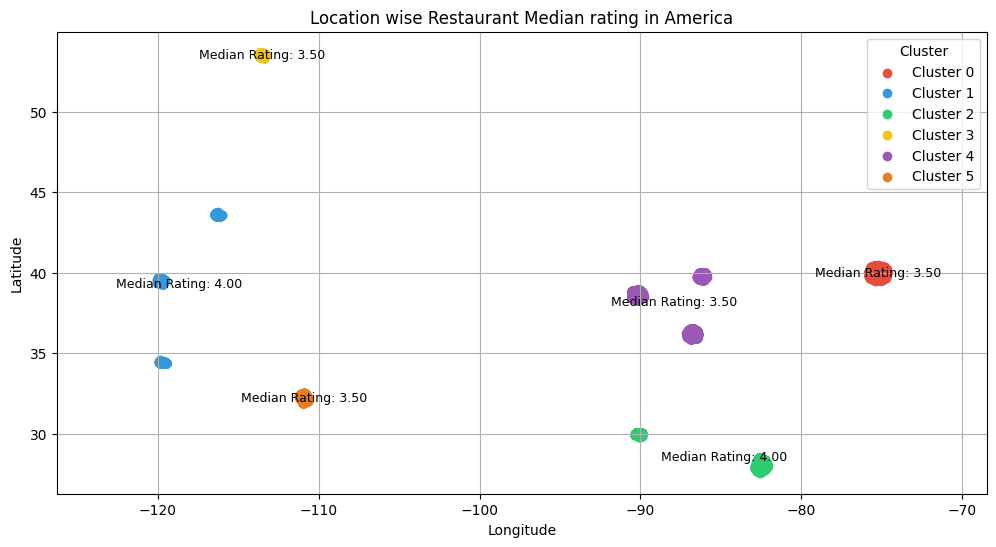

In [41]:
import seaborn as sns
from sklearn.cluster import KMeans

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=0)
restaurantsUSA_df['cluster'] = kmeans.fit_predict(restaurantsUSA_df[['latitude', 'longitude', 'stars']])

vivid_palette = ["#e74c3c", "#3498db", "#2ecc71", "#f1c40f", "#9b59b6", "#e67e22", "#34495e"]

plt.figure(figsize=(12, 6))
plt.axis('equal')

cluster_stats = []
# Plot each cluster with color and label
for cluster_num in np.unique(restaurantsUSA_df['cluster']):
    cluster_data = restaurantsUSA_df[restaurantsUSA_df['cluster'] == cluster_num]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], color=vivid_palette[cluster_num], label=f'Cluster {cluster_num}')

# Analyze the clusters and add annotations
for cluster_num in np.unique(restaurantsUSA_df['cluster']):
    cluster_data = restaurantsUSA_df[restaurantsUSA_df['cluster'] == cluster_num]
    median_rating = cluster_data['stars'].median()
    center_longitude = cluster_data['longitude'].mean()
    center_latitude = cluster_data['latitude'].mean()
    std_deviation = cluster_data['stars'].std()
    high_ratings_count = cluster_data[cluster_data['stars'] >= 3].shape[0]

    # Store in DataFrame
    cluster_stats.append({
        'Cluster': cluster_num,
        'Average Rating': median_rating,
        'Median Rating': median_rating,
        'Standard Deviation': std_deviation
    })

    print(f"Cluster {cluster_num}:")
    print(f"  Average Rating: {median_rating}")
    print(f"  Median Rating: {median_rating}")
    print(f"  Standard Deviation: {std_deviation}")
    print(f"  Count of High Ratings (≥ {3.5}): {high_ratings_count}")

    plt.text(center_longitude, center_latitude, f'Median Rating: {median_rating:.2f}', fontsize=9, ha='center', va='center',
             color='black')

plt.grid(True)
plt.title('Location wise Restaurant Median rating in America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

## Filtering the restaurants/food in CA
### Based on the popularity of restaurants in the USA:
- We decide to choose cluster 1(blue) where the UCLA campus in California as location for our restaurant recommendation
- After filtering the restaurants/food in CA
- There is 64629 restaurants in the dataset, there is 1596 restaurants in CA

In [17]:

def get_restaurants(cusine, state):
    restaurants = [] 
    for i, row in cusine.iterrows():
    
        filtered_df = cusine[cusine['categories'].str.contains('Restaurant|Food', na=False)]
        filtered_df = filtered_df[filtered_df['state'].isin(['CA'])]
        return filtered_df

restaurants_in_ca = get_restaurants(restaurant_cusine,'CA')
print(len(restaurants_in_ca))
restaurants_in_ca[['categories','state']]


1596


,categories,state
85,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",CA
141,"Live/Raw Food, Restaurants, Seafood, Beer Bar,...",CA
401,"Mexican, Beer Bar, Bars, Sports Bars, Nightlif...",CA
431,"Pizza, Restaurants",CA
470,"Burgers, Cafes, Restaurants, Mexican, American...",CA
...,...,...
150230,"Food, Food Delivery Services, Bakeries, Desser...",CA
150239,"Barbeque, Bars, Restaurants, Nightlife",CA
150264,"Event Planning & Services, Wine Tasting Room, ...",CA
150272,"Restaurants, Burgers, Food, Ice Cream & Frozen...",CA


## Visualize Cluster 1 CA directly on map

In [16]:

import folium
from folium.plugins import FastMarkerCluster
from branca.element import Figure

lats = restaurantsUSA_df['latitude'].tolist()
lons = restaurantsUSA_df['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[28.56187979997116, -84.78164053287185],
                        tiles = "Stamen Terrain",
                        zoom_start = 12)
FastMarkerCluster(data=locations).add_to(map1)
fig = Figure(width=800, height=400)  # You can change the width and height here
fig.add_child(map1)
map1

## Apply BERTopic to explore more category that is poppular in CA
- BERTopic use randomese processes during topic modeling, which can lead to different results every time we run the model and its frequency

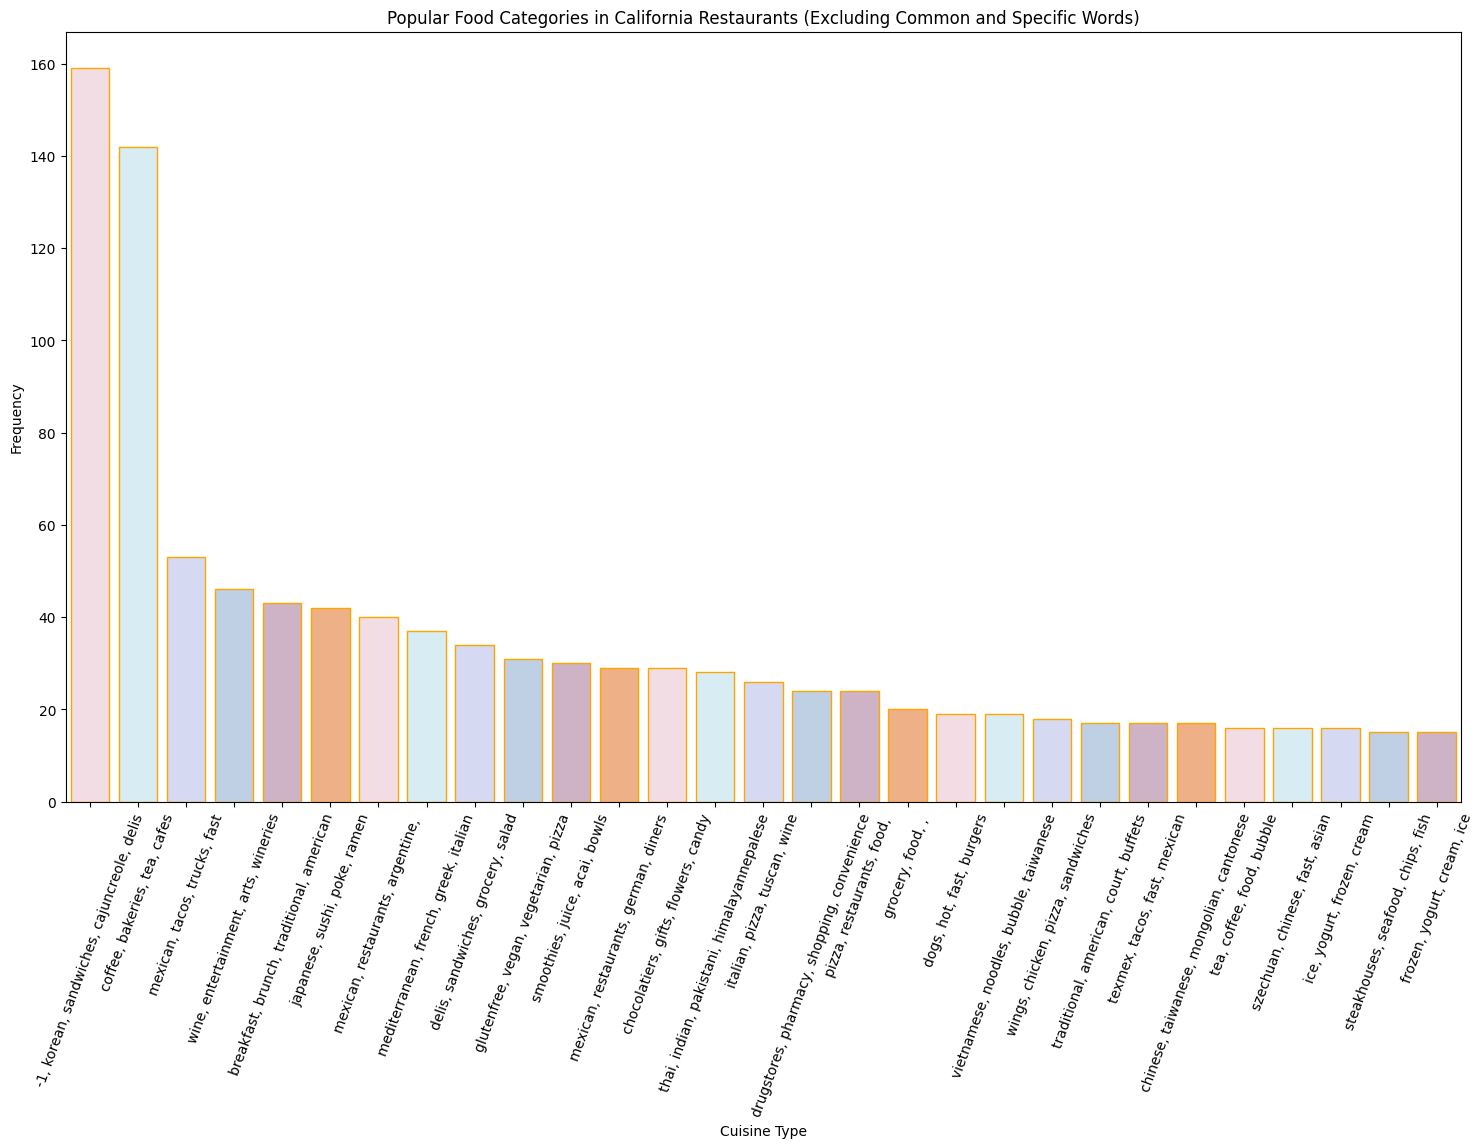

In [19]:
topic_food_ca = BERTopic()
topic_food, probabilities = topic_food_ca.fit_transform(restaurants_in_ca['categories'])
topic_info_food = topic_food_ca.get_topic_info()  

top_cuisines = topic_info_food.head(40)
top_cuisines = top_cuisines.rename(columns={"Name": "Cuisine"})

top_cuisines['Cuisine'] = top_cuisines['Cuisine'].str.replace(r'^\d+\_', '', regex=True).str.replace('_', ', ')
unwanted_topics = ['room', 'cocktail', 'stations','plates','new','specialty','caterer','tour','event','spirits']
top_cuisines = top_cuisines[top_cuisines['Cuisine'].str.contains('|'.join(unwanted_topics)) == False]

plt.figure(figsize=(18, 10))
sns.barplot(x='Cuisine', y='Count', data=top_cuisines, palette=pastel_palette,edgecolor='orange')
plt.title('Popular Food Categories in California Restaurants (Excluding Common and Specific Words)')
plt.xticks(rotation=70)
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.show()

## Calculating the distance from UCLA (CA) to restaurant that close to campus
https://pyturf.readthedocs.io/en/latest/modules/measurement.html#distance
- Calculate the distance of all the restaurants in CA to campus using geospatial library to query the points that calculate the distance between two points
- Set a threshold like 105km to filter out the restaurants
    - There is limited in the dataset, the closest restaurants is over 105km from the campus

Example of using Distance <br>
https://medium.com/analytics-vidhya/turfpy-a-new-way-to-do-spatial-analysis-in-python-c69a7110bc7c



In [20]:
from turfpy.measurement import distance
from geojson import Point, Feature

# restaurant loc df
rest_loc = restaurants_in_ca[['name','longitude','latitude','stars','categories','state','address','city','postal_code']]
total_restaurants = len(rest_loc)
print(f"Number of total restaurant in CA is {total_restaurants}")

# UCLA coordinates
ucla_loc = Feature(geometry=Point((-118.4452, 34.0689))) 

distance_threshold = 105
count_restaurant = 0
restaurants_near_ucla = []

for i, row in rest_loc.iterrows():
    # Convert each restaurant loc to point 
    restaurant_point = Feature(geometry=Point((row['longitude'], row['latitude'])))

    # start: ucla, end: all restaurant
    dist = distance(ucla_loc, restaurant_point, units='km')
    if dist <= distance_threshold:
        # print(f"Distance to restaurant {i}: {dist:.2f} km")
        count_restaurant += 1
        restaurants_near_ucla.append(row)

# Print the number of restaurants within the specified distance from UCLA
print(f"Number of closest restaurants within {distance_threshold} km of UCLA: {count_restaurant}")
print("=======================================================")
# put restraurant near campus into datafram
df_near_ucla = pd.DataFrame(restaurants_near_ucla)
df_near_ucla.rename(columns={'name': 'Name', 'stars': 'Rating', 'categories': 'Food Category'}, inplace=True)
df_near_ucla[['Name','Rating','Food Category']]

Number of total restaurant in CA is 1596
Number of closest restaurants within 105 km of UCLA: 27


,Name,Rating,Food Category
6132,Albertsons,3.0,"Grocery, Drugstores, Pharmacy, Shopping, Food,..."
9404,The Food Liaison,4.5,"Cooking Schools, Shopping, Cooking Classes, Re..."
16487,A Healthy Life,4.5,"Grocery, Food, Weight Loss Centers, Juice Bars..."
26487,YoYumYum Frozen Yogurt,4.0,"Ice Cream & Frozen Yogurt, Juice Bars & Smooth..."
41066,Phoevermore,4.0,"Restaurants, Vietnamese"
...,...,...,...
140127,Zookers Cafe,4.5,"American (Traditional), American (New), Nightl..."
142144,Peebee & Jays,4.0,"Sandwiches, Restaurants"
144208,Subway,2.0,"Restaurants, Fast Food, Sandwiches, Breakfast ..."
145792,Carl's Jr.,2.5,"Restaurants, Fast Food"


## Recommend restaurant near UCLA campus base on food-emotion type from the first dataset
### Statical on restaurant in CA
- We calculate the average ratings of 27 restaurant near UCLA. It gives us a general idea of how well these restaurants are rated overall.
- We also calculate the variance measures to see how much the individual restaurant ratings differ from the mean rating (how varied or diverse the ratings are)
- Result showing the average restaurant close to UCLA is rated slightly above average (we can use this as threshold for recommendation). Generally, customers have positive experiences at these restaurants.
- Variance Ratings (1.07): This is relatively high on a scale of rating 1 to 5. It shows that the rating spread widely. This means some restaurants are rated much higher or lower than the average, there is a significant diversity in customer opinions

In [21]:

# Calculate the mean rating
mean_rating = df_near_ucla['Rating'].mean()
# Calculate the variance of the ratings
variance_rating = df_near_ucla['Rating'].var()
print(f"Mean rating of restaurants within {distance_threshold} km of UCLA: {mean_rating:.2f}")
print(f"Variance in ratings of these restaurants: {variance_rating:.2f}")

emotions_and_foods = {
    "stressed": ["burger", "cafes", "donuts", "ice cream", "chip", "pasta", "french fries"],
    "happy": ["pizza", "ice cream", "sub", "chicken wings", "pretzel", "hot dogs", "deli sandwich"],
    "sadness": ["ice cream", "pizza", "deli", "mac and cheese", "pretzel", "chinese", "pasta", "burger"],
    "bored": ["sandwiches", "cookie", "vietnamese", "mac and cheese", "chicken wings"]
}

# DataFrame to store all recommendations
df_all_recommendations = pd.DataFrame()

# Loop through each emotion and its comfort foods
for emotion, comfort_foods in emotions_and_foods.items():
    for food in comfort_foods:
        # Filter restaurants for the current comfort food and emotion
        filtered_restaurants = df_near_ucla[
            (df_near_ucla['Food Category'].str.contains(food, case=False)) &
            (df_near_ucla['Rating'] >= df_near_ucla['Rating'].mean())
        ]

        top_recommendations = filtered_restaurants.sort_values(by='Rating', ascending=False)

        if not top_recommendations.empty:
            top_recommendations['Comfort Food'] = food.title()
            top_recommendations['Emotion'] = emotion

            # Concatenate to the main DataFrame
            df_all_recommendations = pd.concat([df_all_recommendations, top_recommendations])

# Select specific columns to display
pd.set_option('display.max_rows', None)  # or replace None with a specific number if you want to limit it
pd.set_option('display.max_columns', None)
df_all_recommendations[['Emotion', 'Comfort Food', 'Name', 'Rating', 'address', 'city', 'state', 'postal_code']]



Mean rating of restaurants within 105 km of UCLA: 3.43
Variance in ratings of these restaurants: 1.07


,Emotion,Comfort Food,Name,Rating,address,city,state,postal_code
140127,stressed,Burger,Zookers Cafe,4.5,5404 Carpinteria Ave,Carpinteria,CA,93013
9404,stressed,Cafes,The Food Liaison,4.5,1033 Casitas Pass Rd,Carpinteria,CA,93013
75690,stressed,Cafes,Caje,4.5,1007 Casitas Pass Rd,Carpinteria,CA,93013
64321,stressed,Donuts,Tyler's Donuts,4.0,1002 Casitas Pass Rd,Carpinteria,CA,93013
26487,stressed,Ice Cream,YoYumYum Frozen Yogurt,4.0,1005 Casitas Pass Rd,Carpinteria,CA,93013
146309,happy,Pizza,Little Caesars Pizza,4.5,1048 Casitas Pass Rd,Carpinteria,CA,93013
46224,happy,Pizza,Rusty's Pizza Parlor,3.5,5250 Carpinteria Ave,Carpinteria,CA,93013
26487,happy,Ice Cream,YoYumYum Frozen Yogurt,4.0,1005 Casitas Pass Rd,Carpinteria,CA,93013
46224,happy,Chicken Wings,Rusty's Pizza Parlor,3.5,5250 Carpinteria Ave,Carpinteria,CA,93013
110741,happy,Hot Dogs,Surf Dog,5.0,The Bluffs Parking Lot,Carpinteria,CA,93190
